In [1]:
import numpy as np # Lib with numery python
import pandas as pd # To read the .tsv file
import networkx as nx # Lib to create and manipulate graph
import collections # Lib to count values
import matplotlib.pyplot as plt # Lib to plot the graphs

### Reading data

In [2]:
#Dataframe with edges in the graph
data = pd.read_csv('net - net.csv', header=None)

### Creating the graph

In [3]:
def add_edges(G, nodes):
    '''
    G: A graph
    
    nodes: list with two values each of ones is a node
    
    This function create a edge betwen the nodes in the nodes in the graph G.
    '''
    G.add_edge(nodes[0], nodes[1])

In [4]:
G = nx.Graph() # Create the main graph
data.apply(lambda x: add_edges(G, x),axis=1) # Apply the function creating the edges

max_degree = max(sorted([d for n, d in G.degree()], reverse=True)) # Find the max dregee of the graph

### Degree Distribution

In [5]:
def log(number):
    return np.log(number)

In [6]:
degs = [G.degree(n) for n in G.nodes()] # Find the degree of nodes
dict_deg_distribution = collections.Counter(degs) # Count how many times each degree apears

list_uniq_degrees = np.unique(degs) # List with unique degree

### Prepare log log

In [7]:
list_prob_degree = [] # List with probability of each degree

for deg_dist in dict_deg_distribution: # Loop to get the degree distributionm
    list_prob_degree.append(dict_deg_distribution[deg_dist]/len(degs))

### Prepare cumulative plot

In [8]:
dict_cumulative_degree = {} # Dict with how many nodes are degree equal or bigest that
# data_sample = np.arange(1, max(degs)+1)

for deg in list_uniq_degrees:
    dict_cumulative_degree[deg] = np.count_nonzero(deg <= degs)
    
list_cumulative_prob = list(map(lambda x: (x[1]/len(degs)), dict_cumulative_degree.items()))

### Ploting

Text(0, 0.5, 'log Pk')

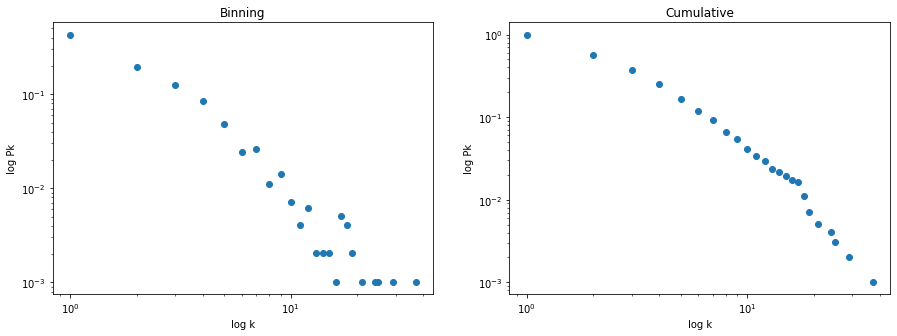

In [9]:
# Plotting the degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

#Plot Binning
ax1.scatter((list(dict_deg_distribution.keys())),
            (list_prob_degree))

ax1.set_yscale("log")
ax1.set_xscale("log")
ax1.set_xlabel('log k')
ax1.set_ylabel('log Pk')
ax1.set_title('Binning')

# Plot Cumulative
ax2.scatter(list_uniq_degrees, list_cumulative_prob)

ax2.set_xscale("log")
ax2.set_yscale("log")
ax2.set_title('Cumulative')
ax2.set_xlabel('log k')
ax2.set_ylabel('log Pk')

### Is Scale-free?

In [10]:
# Making a random network to compare with the G graph
G_random = nx.gnm_random_graph(G.number_of_nodes() ,G.number_of_edges())

In [11]:
# Do same metrics that scale-free network to comapre
degs_random = [G_random.degree(n) for n in G_random.nodes()] # Find the degree of nodes
dict_random_deg_distribution = collections.Counter(degs_random) # Count how many times each degree apears

In [12]:
list_random_prob_degree = [] # List with probability of each degree

for deg_random_dist in dict_random_deg_distribution: # Loop to get the degree distributionm
    list_random_prob_degree.append(dict_random_deg_distribution[deg_random_dist]/len(degs_random))

In [13]:
# Find the max degree in the network
random_max_degree = max(sorted([d for n, d in G_random.degree()], reverse=True))

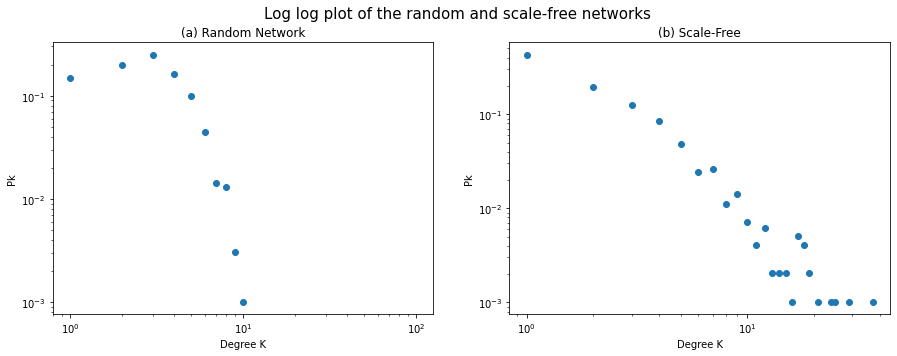

In [14]:
# Plotting the degree distribution
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,5))

fig.suptitle('Log log plot of the random and scale-free networks', size=15)

#Plot Random Network
ax1.scatter((list(dict_random_deg_distribution.keys())),
            (list_random_prob_degree))

ax1.set_xlabel("Degree K")
ax1.set_ylabel('Pk')
ax1.set_title('(a) Random Network')
ax1.set_yscale("log")
ax1.set_xscale("log")

# Plot Scale-Free
ax2.scatter((list(dict_deg_distribution.keys())),
            (list_prob_degree))

ax2.set_title('(b) Scale-Free')
ax2.set_xlabel("Degree K")
ax2.set_ylabel('Pk')
ax2.set_yscale("log")
ax2.set_xscale("log")

In [15]:
print(f'A Random Network Figure(a) with {G_random.number_of_nodes()} nodes and '+
      f'{G_random.number_of_edges()} edges have a max degree equals {random_max_degree}')

A Random Network Figure(a) with 982 nodes and 1449 edges have a max degree equals 10


In [16]:
print(f'A second image Figure(b) with {G.number_of_nodes()} nodes and '+
      f'{G.number_of_edges()} edges have a max degree equals {max_degree}')

A second image Figure(b) with 982 nodes and 1449 edges have a max degree equals 37


With the information above, is possible to confirm the graph have a scale-free distribution